In [1]:
from hb_conv import HbConv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load data
with open('data/combined_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:

c_cols = [f"c NIRS 1.channel[{i}]" for i in range(12)]
r_cols = [f"c NIRS 1.channel[{i}].1" for i in range(12)]
c_pd_reads = data[c_cols].to_numpy().T
r_pd_reads = data[r_cols].to_numpy().T
print(c_pd_reads.shape)

In [ ]:

hb_c = HbConv(c_pd_reads)
hb_r = HbConv(r_pd_reads)

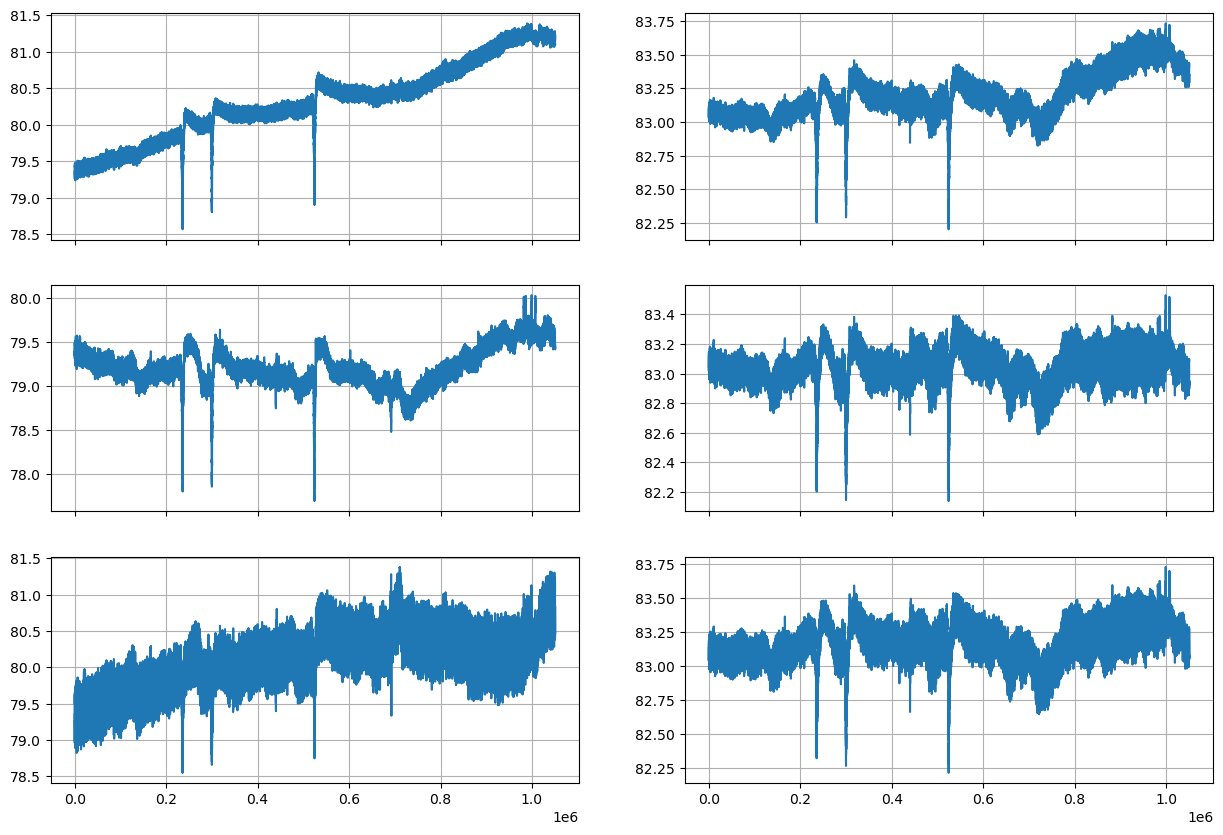

In [4]:
plt.subplots(3,2, figsize=(15,10), sharex=True)
plt.subplot(321)
plt.plot(hb_c.observed["toi"])
plt.grid()
plt.subplot(323)
plt.plot(hb_c.cleaned["toi_abs"])
plt.grid()
plt.subplot(325)
plt.plot(hb_c.cleaned["toi_ods"])
plt.grid()
plt.subplot(322)
plt.plot(hb_r.observed["toi"])
plt.grid()
plt.subplot(324)
plt.plot(hb_r.cleaned["toi_abs"])
plt.grid()
plt.subplot(326)
plt.plot(hb_r.cleaned["toi_ods"])
plt.grid()

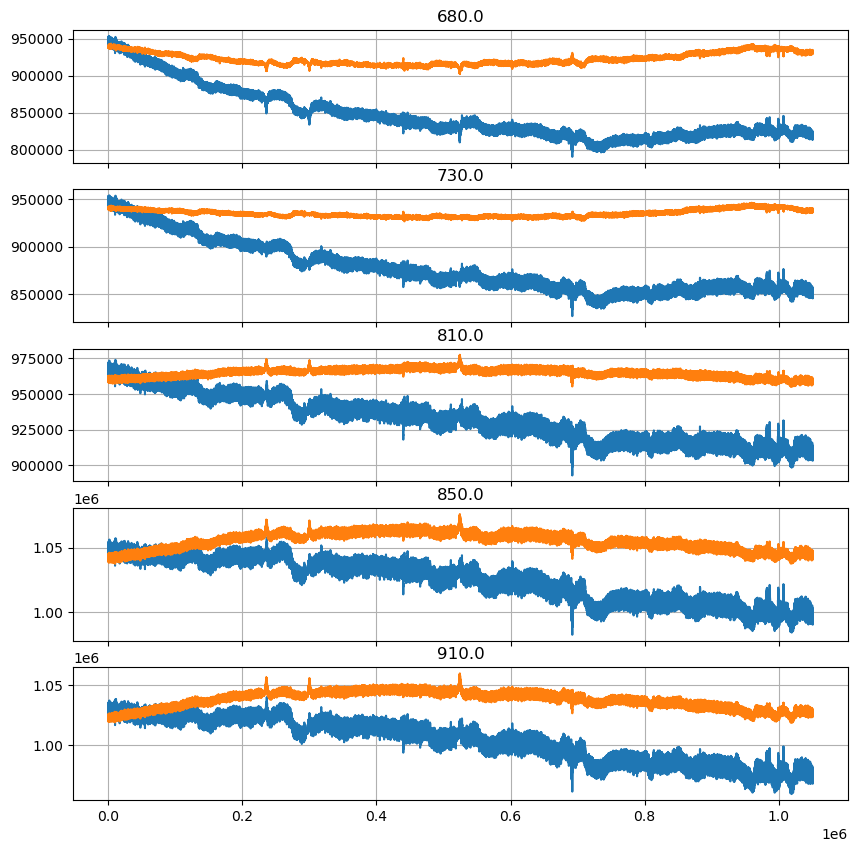

In [27]:
wavelenghts = (hb_c.get_params())["wavelengths"]
near = hb_c.observed["raw_abs"][:5,:]
far = hb_c.observed["raw_abs"][6:11,:]
near_clean = hb_c.cleaned["raw_abs"][:5,:]


plt.subplots(5, 1, figsize=(10,10), sharex=True)
for i in range(5):
    plt.subplot(5,1,1+i)
    plt.plot(near[i,:])
    plt.plot(near_clean[i,:])
    plt.title(wavelenghts[i])
    plt.grid()



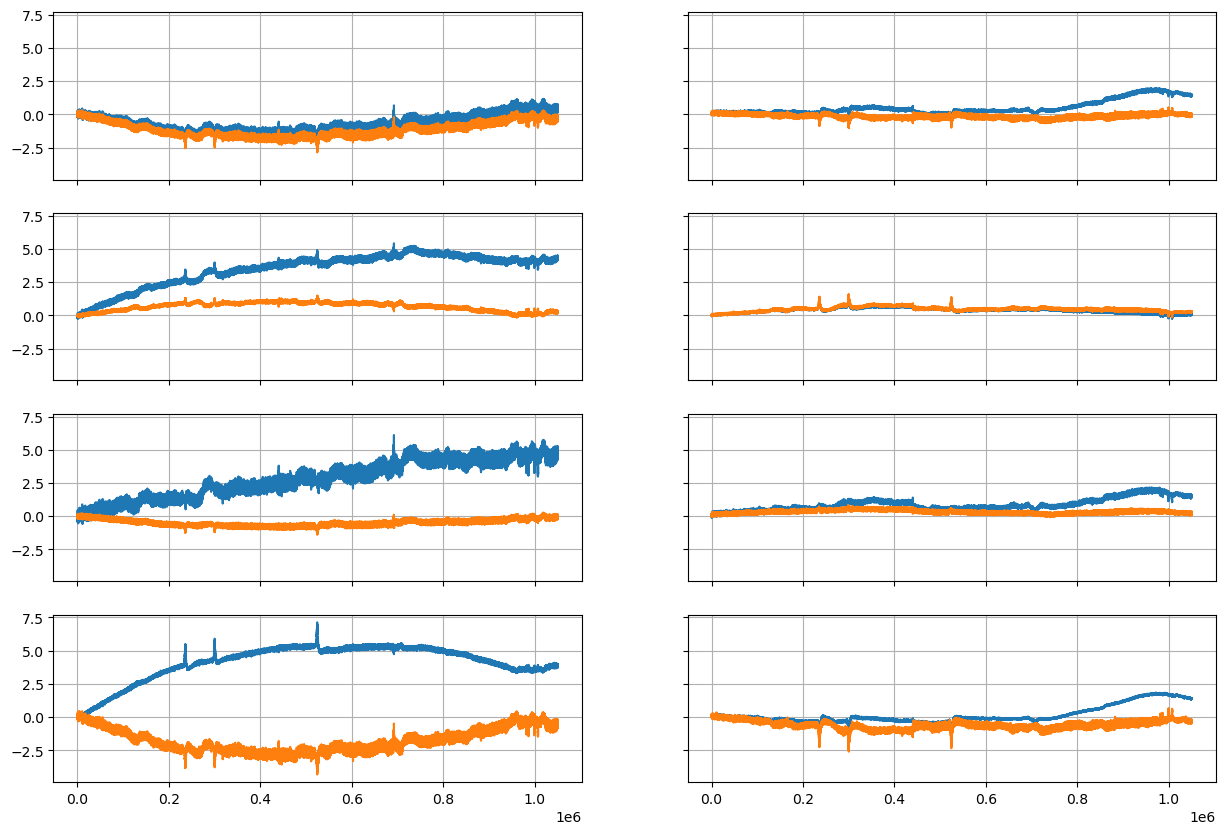

In [28]:
hb_obs = hb_c.observed["hbc_near"]
hb_obs = np.vstack((hb_obs, np.sum(hb_obs, axis=0), np.diff(hb_obs, axis=0)))

hb_cln = hb_c.cleaned["hbc_near"]
hb_cln = np.vstack((hb_cln, np.sum(hb_cln, axis=0), np.diff(np.flipud(hb_cln), axis=0)))
    # plt.title(params["wv"])
plt.subplots(4, 2, figsize=(15,10), sharex=True, sharey=True)

for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.plot(hb_obs[i,:])
    plt.plot(hb_cln[i,:])
    plt.grid()

hb_obs = hb_r.observed["hbc_near"]
hb_obs = np.vstack((hb_obs, np.sum(hb_obs, axis=0), np.diff(np.flipud(hb_obs), axis=0)))

hb_cln = hb_r.cleaned["hbc_near"]
hb_cln = np.vstack((hb_cln, np.sum(hb_cln, axis=0), np.diff(np.flipud(hb_cln), axis=0)))

for i in range(4):
    plt.subplot(4,2,2*i+2)
    plt.plot(hb_obs[i,:])
    plt.plot(hb_cln[i,:])
    plt.grid()

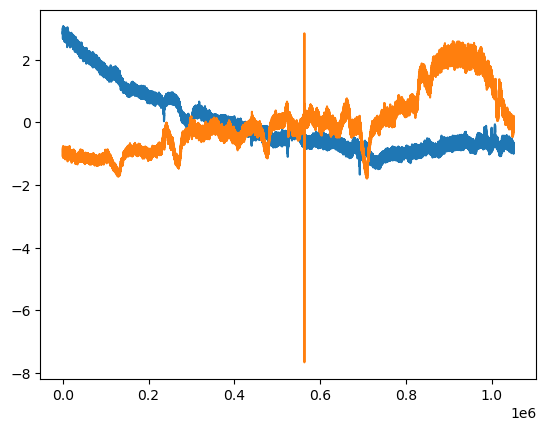

In [21]:
from scipy.stats import zscore
plt.plot(zscore(near[0,:]))
plt.plot(zscore(data["MAP"]))

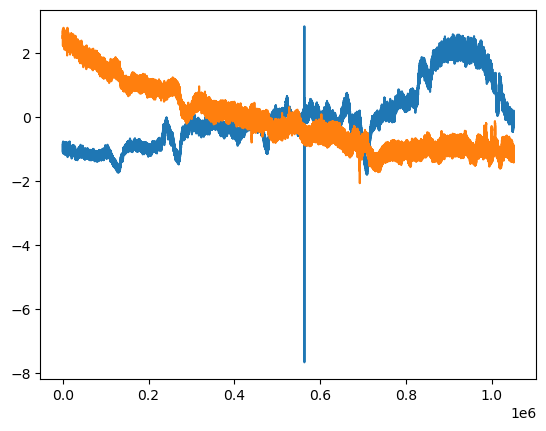

In [22]:
_, noise = hb_c.svd_clean(near)
plt.plot(zscore(data["MAP"]))
plt.plot(zscore(noise))

In [58]:
X = np.vstack(((near.T - np.mean(near, axis=1)).T, map))
u,s,v = np.linalg.svd(X, full_matrices=False)
print(s/np.sum(s))

[7.76128650e-01 1.96636553e-01 1.26692393e-02 7.46902031e-03
 6.96387981e-03 1.32657757e-04]


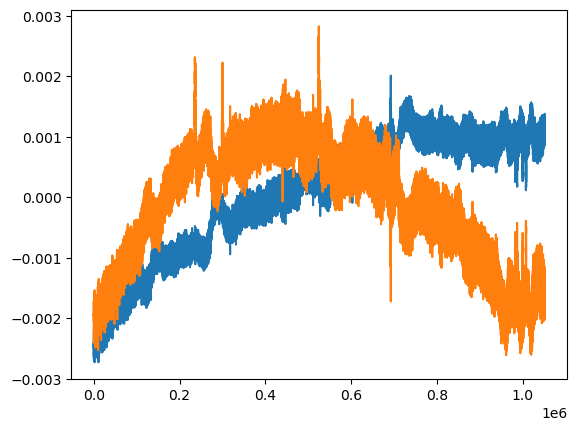

In [56]:
plt.plot(v[0,:])
plt.plot(v[1,:])

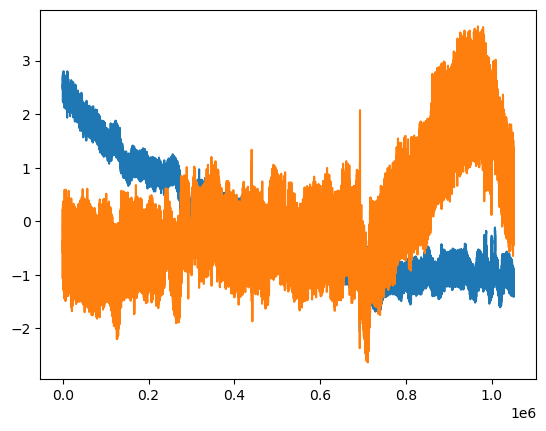

In [29]:
_, noise_ods = hb_c.svd_clean(near/far)
plt.plot(zscore(noise))
plt.plot(zscore(noise_ods))

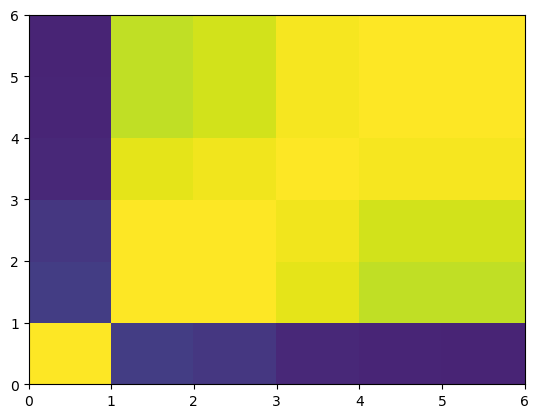

In [65]:
plt.pcolor(np.corrcoef(map, near))
plt.clim([-1,1])